In [1]:
import pandas as pd
import numpy as np

# Load the CSV files
stimulus_data = pd.read_csv('../../data/sim1/vns_stimulations.csv', header='infer').values
response_data = pd.read_csv('../../data/sim1/vns_responses.csv', header='infer').values

stimulus_data = stimulus_data[:,1:].T 
response_data = response_data[:,1:].T 

vns_data = pd.read_csv('../../data/sim1/vns_cervical_rat_data.csv')
activation_data = vns_data[['AB_fibers_activation', 'C_fibers_activation']]
# print the sizes with text
print('stimulus_data:', stimulus_data.shape)
print('response_data:', response_data.shape)
print('activation_data:', activation_data.shape)

stimulus_data: (13702, 2498)
response_data: (13702, 2498)
activation_data: (13702, 2)


In [2]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18, 'font.family': 'Times New Roman'})

In [3]:
# sampling period is 0.1 ms make a time vector
time = np.arange(0, stimulus_data.shape[1], 1) * 0.1

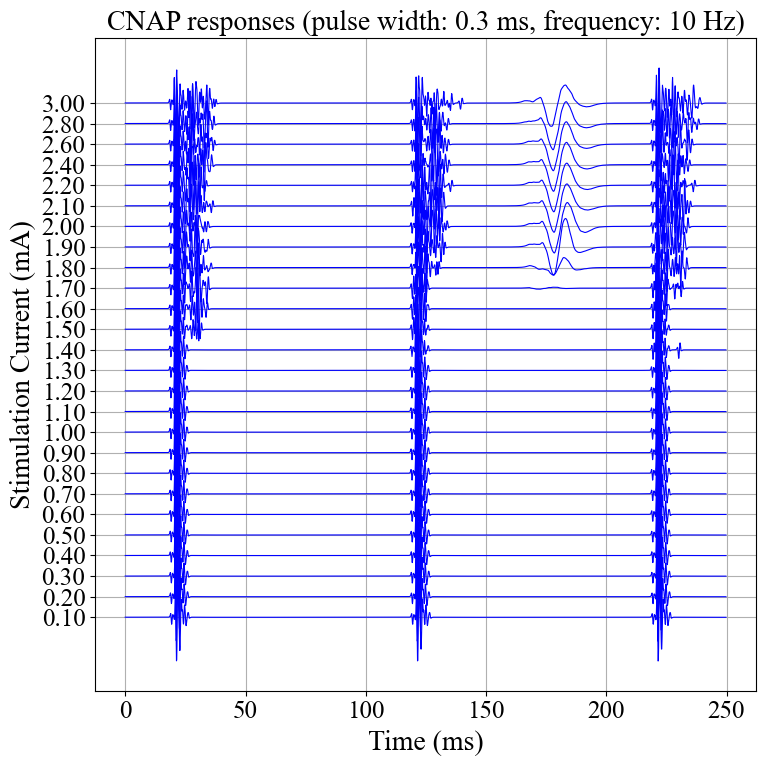

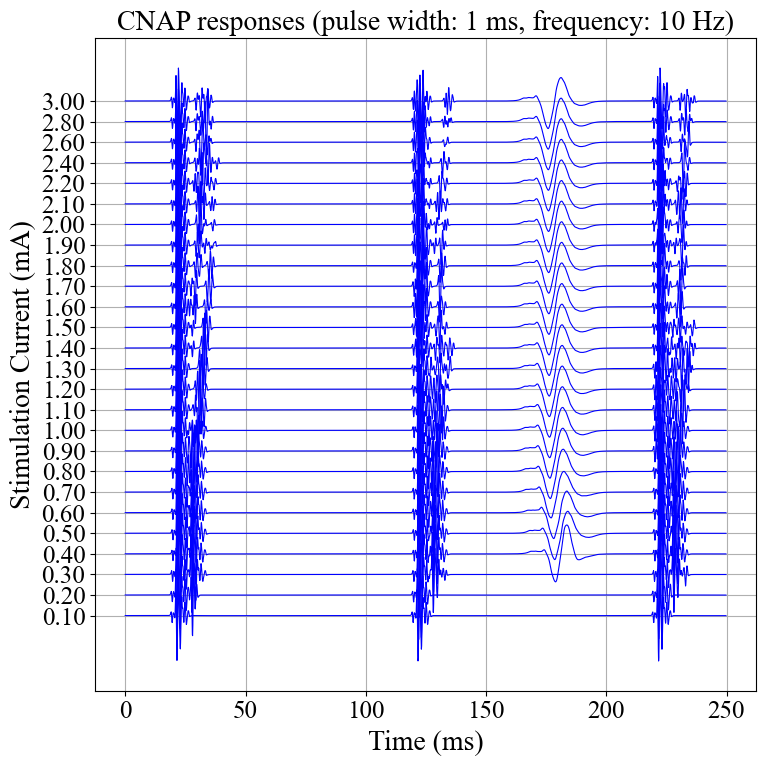

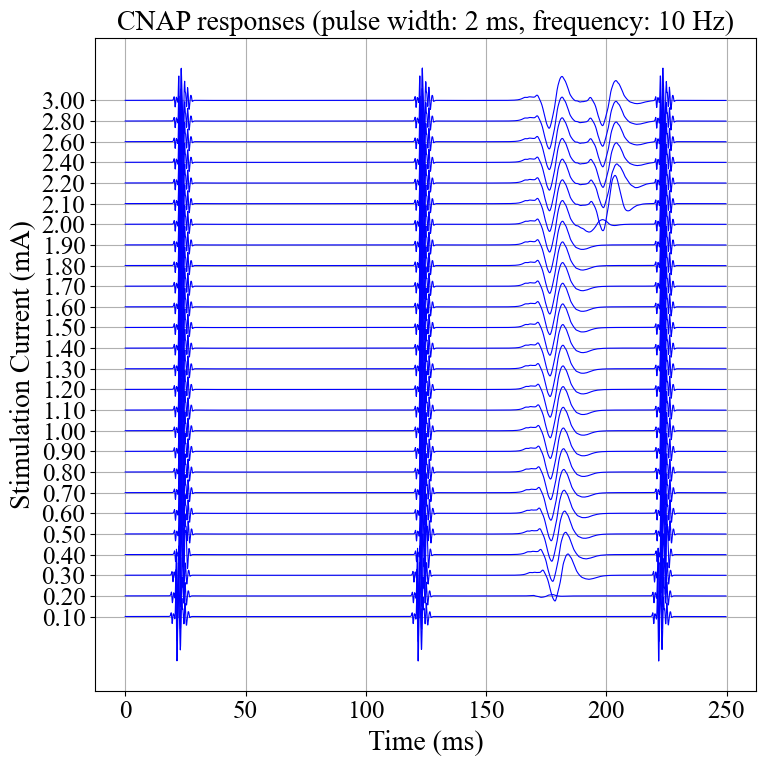

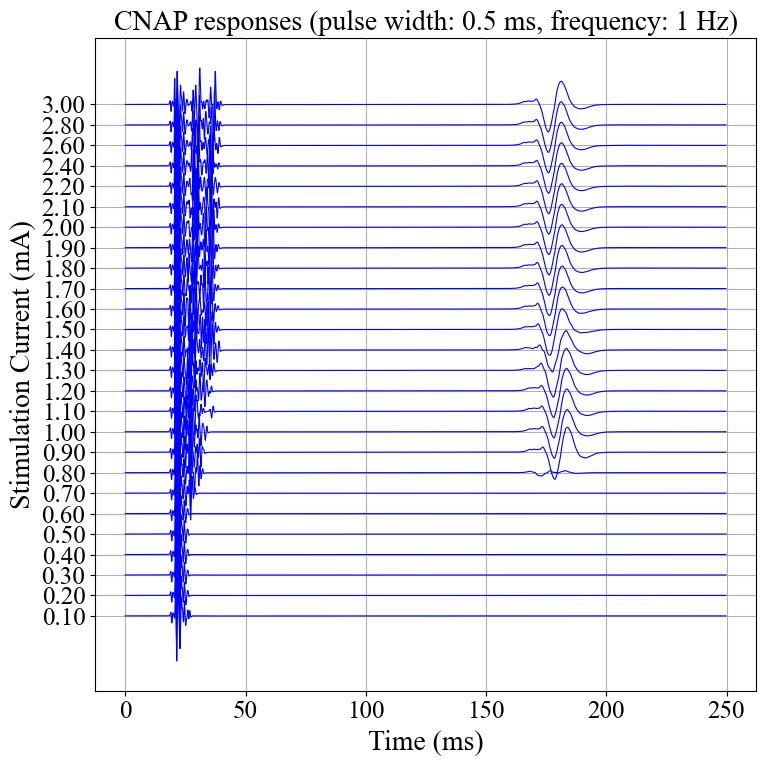

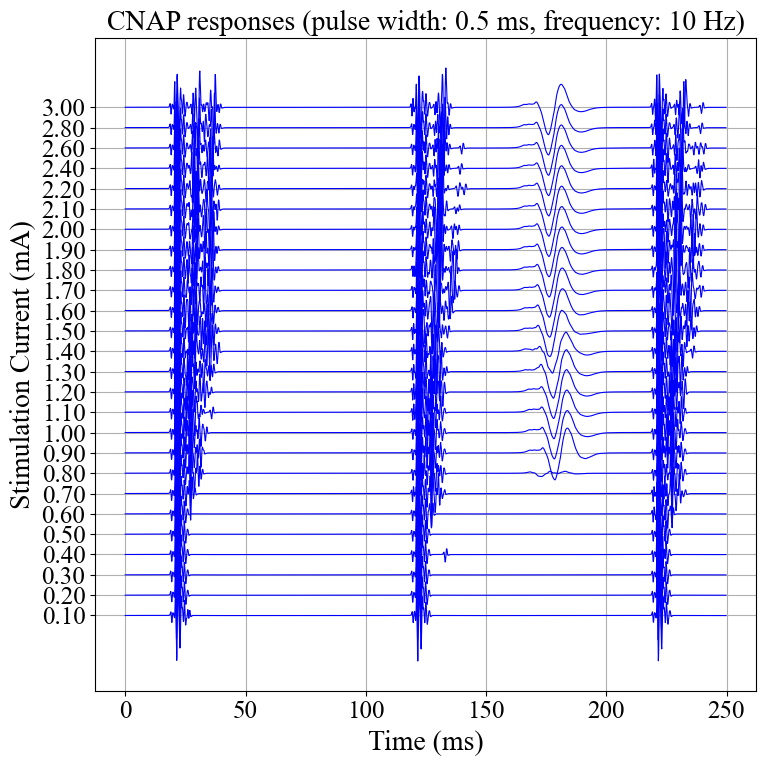

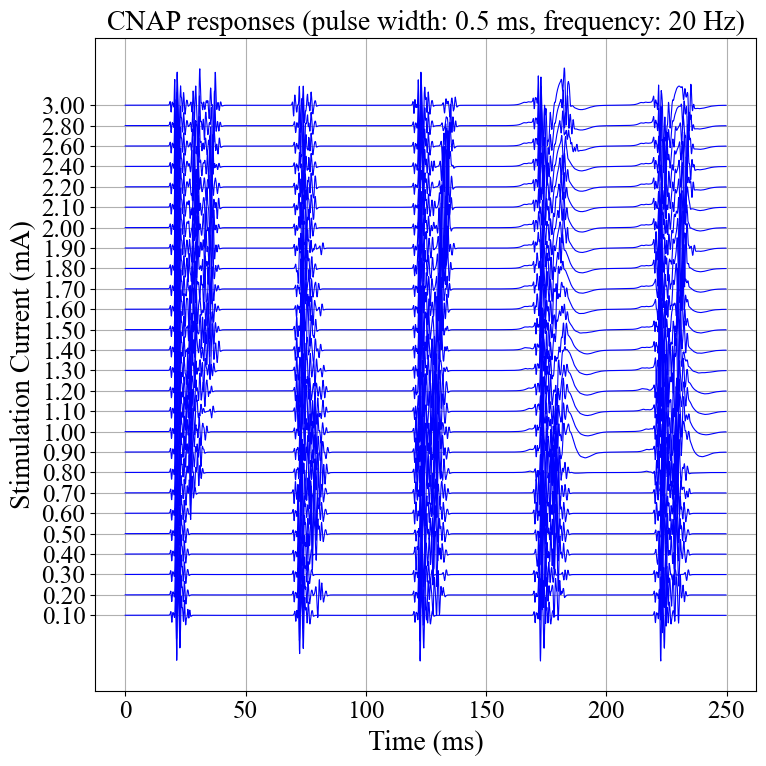

In [5]:
# Example filter criteria
selected_sample_ids = [7, 7, 7, 5, 5, 5]  # Replace with the actual sample ID you want
selected_pulse_width = [0.3, 1, 2, 0.5, 0.5, 0.5]  # Replace with the actual pulse width
selected_frequency = [10, 10, 10, 1, 10, 20]  # Replace with the actual frequency

for selected_sample_id, selected_pulse_width, selected_frequency in zip(selected_sample_ids, selected_pulse_width, selected_frequency):    
    filtered_indices = vns_data[
        (vns_data['sample_id'] == selected_sample_id) &
        (vns_data['pulse_width'] == selected_pulse_width) &
        (vns_data['frequency'] == selected_frequency)
    ].index
    # Filter the corresponding stimulus and response data
    filtered_stimulus_data = stimulus_data[filtered_indices, :]
    filtered_response_data = response_data[filtered_indices, :]
    filtered_amplitudes = vns_data.loc[filtered_indices, 'amplitude'].values

    # Sort by amplitude to ensure proper stacking order
    sorting_indices = np.argsort(filtered_amplitudes)
    filtered_stimulus_data = filtered_stimulus_data[sorting_indices, :]
    filtered_response_data = filtered_response_data[sorting_indices, :]
    filtered_amplitudes = filtered_amplitudes[sorting_indices]

    # Generate the stacked plot with current labels on y-axis
    plt.figure(figsize=(8, 8))
    for i in range(filtered_response_data.shape[0]):
        plt.plot(time, filtered_response_data[i, :] + i*1.2, color='blue', linewidth=0.8)

    # Customize the plot
    plt.xlabel('Time (ms)', fontsize=20)
    plt.ylabel('Stimulation Current (mA)', fontsize=20)
    plt.yticks(np.arange(0, len(filtered_amplitudes) * 1.2, 1.2), [f'{amp:.2f}' for amp in filtered_amplitudes])
    plt.title(f'CNAP responses (pulse width: {selected_pulse_width} ms, frequency: {selected_frequency} Hz)', fontsize=20)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'CNAP_responses_{selected_sample_id}_{selected_pulse_width}_{selected_frequency}.png', dpi=400, bbox_inches='tight', format='png')
    plt.savefig(f'CNAP_responses_{selected_sample_id}_{selected_pulse_width}_{selected_frequency}.eps', dpi=400, bbox_inches='tight', format='eps')
    plt.show()